도착항 국가에 따른 대기시간 분포

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_parquet("../data/train.parquet")

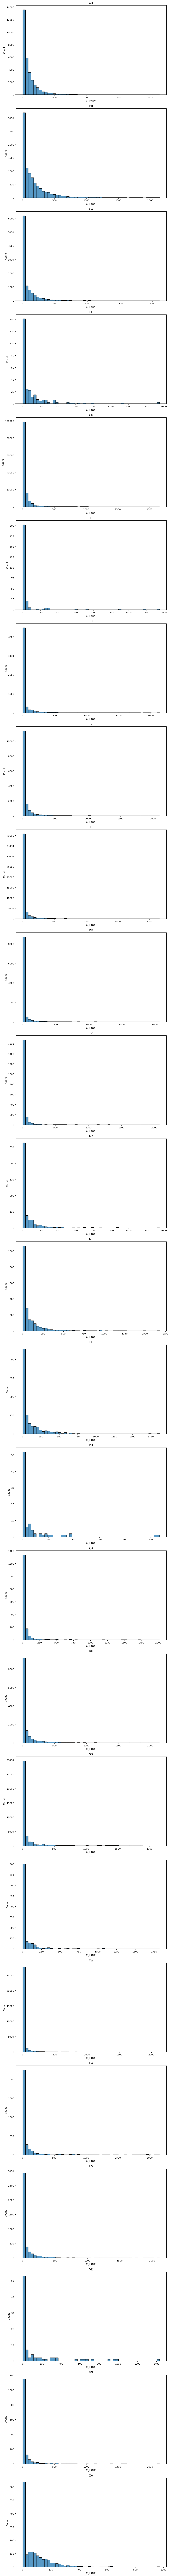

In [5]:
unique_names = sorted(train_df["ARI_CO"].unique())

# subplot을 생성하기 위한 행과 열의 수를 계산합니다.
num_rows = len(unique_names)
num_cols = 1  # 여기서는 1열로 표시합니다.

# 전체 figure를 생성합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))

# 각 고유한 "ARI_CO" 값에 대한 subplot을 생성합니다.
for i, name in enumerate(unique_names):
    df = train_df[train_df["ARI_CO"] == name]
    ax = sns.histplot(df["CI_HOUR"], bins=50, ax=axes[i])  # 각 subplot을 axes[i]에 그립니다.
    ax.set_title(name)

# subplot 간의 간격을 조정합니다.
plt.tight_layout()

# 전체 figure를 표시합니다.
plt.show()